![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.



In [2]:
# MODULOS

# Omitir la advertencia que arroja al importar el xlsx
import warnings
warnings.simplefilter("ignore")
# Importar pandas
import pandas as pd
from pandas import option_context
# Importar unidecode para limpiar caracteres con diacríticos
from unidecode import unidecode
# Importar seaborn para gráficos
import seaborn as sns
# Importar matplotlib para gráficos
import matplotlib.pyplot as plt
%matplotlib inline
# Importar display y Markdown para texto formateado
from IPython.display import display, Markdown
#from tabulate import tabulate
# Importar numpy
#import numpy as np

**2.1 Cargar la base de datos y revisar el tipo de cada columna del dataset.**


In [3]:
# Declarar una función para eliminar las filas con todas las columnas en blanco
def borrar_filas_vacias(dataframe):
    # Encontrar las filas con todas las columnas en blanco
    mask = dataframe.isnull().all(axis=1)
    # Borrar estas filas del dataframe
    dataframe.drop(dataframe[mask].index, inplace=True)

# Cargar el libro de excel
with pd.ExcelFile('BBDD_Hospitalización.xlsx') as xlsx:
    df_original = pd.read_excel(xlsx, sheet_name='Datos')

# Eliminar las filas con todas las columnas en blanco
borrar_filas_vacias(df_original)

# Mostrar info de las columnas
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [4]:
# Declarar una función para recopilar los valores únicos que tiene cada columna
def valores_unicos(dataframe):
    
    # Mostrar título
    display(Markdown("### Valores unicos por columna:"))

    # Crear un dataframe en blanco para almacenar los resultados
    valores_unicos = pd.DataFrame({'Columna':[],'Valores':[]})

    # Iterar sobre cada columna y mostrar los valores unicos
    for col in dataframe.columns: valores_unicos.loc[len(valores_unicos.index)] = [col, dataframe[col].unique()]

    # Mostrar la tabla
    with option_context('display.max_colwidth', None): display(valores_unicos)

# Mostrar los valores únicos de cada columna
valores_unicos(df_original)

### Valores unicos por columna:

,Columna,Valores
0,EDAD,"[53.0, 56.0, 57.0, 55.0, 67.0, 69.0, 44.0, 54.0, 68.0, 43.0, 65.0, 62.0, 71.0, 64.0, 77.0, 75.0, 73.0, 63.0, 66.0, 84.0, 42.0, 61.0, 47.0, 48.0, 49.0, 81.0, 52.0, 74.0, 70.0, 58.0, 59.0, 60.0, 50.0, 143.0, 151.0, 76.0, 78.0, 46.0, 51.0, 79.0, 39.0, 72.0, 80.0, 45.0, 82.0]"
1,DIABETES,"[NO, SI]"
2,HOSPITALIZACIÓN ULTIMO MES,"[NO, SI]"
3,PSA,"[4.0, 7.7, 29.0, 7.0, 6.2, 6.0, nan, 5.7, 4.3, 5.19, 4.5, 14.0, 10.0, 9.0, 25.0, 91.8, 21.0, 98.0, 7.5, 10.8, 10.5, 90.0, 5.1, 16.0, 17.0, 23.0, 6.4, 100.0, 5.8, 38.9, 20.0, 40.0, 9.5, 9.6, 10.2, 8.5, 53.0, 19.0, 5.6, 3.5, 15.0, 5.2, 17.7, 4.6, 8.0, 8.7, 4.8, 7.6, 10.6, 4.7, 18.0, 27.0, 5.0, 8.39, 4.79, 6.8, 4.9, 7.8, 16.2, 8.3, 6.5, 7.2, 5.97, 6.98, 12.0, 24.0, 8.9, 6.3, 9.3, 12.6, 5.5, 13.8, 13.4, 11.0, 21.3, 7.1, 11.9, 3.8, 15.6, 5.4, 22.0, 12.8, 4.1, 2.0, 9.4, 4.49, 11.5, 5.31, 33.6, 48.3, 5.11, 8.8, 26.0, 0.6, 31.0, 27.6, 83.0, 15.85, 20.2, 14.9, ...]"
4,BIOPSIAS PREVIAS,"[NO, SI, nan]"
5,VOLUMEN PROSTATICO,"[SI, NO, nan]"
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,"[FLUOROQUINOLONA_AMINOGLICOSIDO, CEFALOSPORINA_AMINOGLUCOCIDO, OROQUINOLONAS, FLUOROQUINOLONA_AMINOGLICÓSIDO, OTROS]"
7,NUMERO DE MUESTRAS TOMADAS,"[12.0, 24.0, 18.0, 6.0, 16.0, 20.0, 10.0, 4.0, 8.0, 15.0, 22.0, 14.0]"
8,CUP,"[NO, SI, nan]"
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,"[NO, SI, EPOC, SI, ASMA, SI, nan]"


__2.2 Realizar las conversiones de tipos de datos.__



In [5]:
# Declarar la función para realizar conversiones de tipos de datos
def convertir_datos(dataframe):

    # Crear copia del dataframe
    df = dataframe.copy(deep=True)

    # Almacenar el mapeo booleano en un diccionario
    boolmap = {'SI': True, 'NO': False}

    # Convertir DIABETES, HOSPITALIZACIÓN ULTIMO MES, BIOPSIAS PREVIAS, VOLUMEN PROSTATICO, CUP, FIEBRE, ITU, HOSPITALIZACION a booleano
    booleanas = ['DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','CUP','FIEBRE','ITU','HOSPITALIZACION']
    for col in booleanas: df[col] = df[col].map(boolmap)

    # Función para convertir un número
    def convertir_numero(numero,valor_error):
        # Tratar de convertir el valor a entero
        try:
            float(numero)
            # Retornar el mismo valor si la conversión es correcta
            return numero
        # Capturar el error si falla la conversión
        except ValueError:
            # Retornar NaN si el valor no es un número
            return valor_error

    # Convertir EDAD, PSA, DIAS HOSPITALIZACION MQ, DIAS HOSPITALIZACIÓN UPC, NUMERO DE MUESTRAS TOMADAS a entero
    numericas = ['EDAD','PSA','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','NUMERO DE MUESTRAS TOMADAS']
    for col in numericas: df[col] = df[col].apply(lambda x: convertir_numero(x,None))

    # NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
    df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].apply(lambda x: convertir_numero(x,31))

    # Devolver el dataframe
    return df

# Realizar conversiones de tipos de datos
df = convertir_datos(df_original)

# Borrar el dataframe original para liberar RAM
del df_original

# Mostrar info de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    bool   
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    bool   
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [6]:
# Mostrar los valores únicos de cada columna después de la conversión
valores_unicos(df)

### Valores unicos por columna:

,Columna,Valores
0,EDAD,"[53.0, 56.0, 57.0, 55.0, 67.0, 69.0, 44.0, 54.0, 68.0, 43.0, 65.0, 62.0, 71.0, 64.0, 77.0, 75.0, 73.0, 63.0, 66.0, 84.0, 42.0, 61.0, 47.0, 48.0, 49.0, 81.0, 52.0, 74.0, 70.0, 58.0, 59.0, 60.0, 50.0, 143.0, 151.0, 76.0, 78.0, 46.0, 51.0, 79.0, 39.0, 72.0, 80.0, 45.0, 82.0]"
1,DIABETES,"[False, True]"
2,HOSPITALIZACIÓN ULTIMO MES,"[False, True]"
3,PSA,"[4.0, 7.7, 29.0, 7.0, 6.2, 6.0, nan, 5.7, 4.3, 5.19, 4.5, 14.0, 10.0, 9.0, 25.0, 91.8, 21.0, 98.0, 7.5, 10.8, 10.5, 90.0, 5.1, 16.0, 17.0, 23.0, 6.4, 100.0, 5.8, 38.9, 20.0, 40.0, 9.5, 9.6, 10.2, 8.5, 53.0, 19.0, 5.6, 3.5, 15.0, 5.2, 17.7, 4.6, 8.0, 8.7, 4.8, 7.6, 10.6, 4.7, 18.0, 27.0, 5.0, 8.39, 4.79, 6.8, 4.9, 7.8, 16.2, 8.3, 6.5, 7.2, 5.97, 6.98, 12.0, 24.0, 8.9, 6.3, 9.3, 12.6, 5.5, 13.8, 13.4, 11.0, 21.3, 7.1, 11.9, 3.8, 15.6, 5.4, 22.0, 12.8, 4.1, 2.0, 9.4, 4.49, 11.5, 5.31, 33.6, 48.3, 5.11, 8.8, 26.0, 0.6, 31.0, 27.6, 83.0, 15.85, 20.2, 14.9, ...]"
4,BIOPSIAS PREVIAS,"[False, True, nan]"
5,VOLUMEN PROSTATICO,"[True, False, nan]"
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,"[FLUOROQUINOLONA_AMINOGLICOSIDO, CEFALOSPORINA_AMINOGLUCOCIDO, OROQUINOLONAS, FLUOROQUINOLONA_AMINOGLICÓSIDO, OTROS]"
7,NUMERO DE MUESTRAS TOMADAS,"[12.0, 24.0, 18.0, 6.0, 16.0, 20.0, 10.0, 4.0, 8.0, 15.0, 22.0, 14.0]"
8,CUP,"[False, True, nan]"
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,"[NO, SI, EPOC, SI, ASMA, SI, nan]"


**2.3 Revisar la cantidad de nulos que tiene cada columna.**


In [7]:
# Declarar una función para recopilar los valores faltantes en columna
def mostrar_faltantes(dataframe):

    # Extraer la lista de columnas con faltantes
    columnas_con_faltantes = dataframe.columns[dataframe.isnull().any()].tolist()

    # Mostrar título
    display(Markdown("__Valores faltantes por columna:__"))

    # Crear un dataframe en blanco para almacenar los resultados
    valores_faltantes = pd.DataFrame({'Columna':[],'Valores faltantes':[]})

    # Iterar sobre cada columna y mostrar los valores faltantes
    for col in columnas_con_faltantes: valores_faltantes.loc[len(valores_faltantes.index)] = [col, dataframe[col].isnull().sum()]

    # Mostrar la tabla
    display(valores_faltantes)

# Mostrar los valores faltantes en cualquier columna
mostrar_faltantes(df)

__Valores faltantes por columna:__

,Columna,Valores faltantes
0,PSA,4
1,BIOPSIAS PREVIAS,2
2,VOLUMEN PROSTATICO,1
3,CUP,1
4,ENF. CRONICA PULMONAR OBSTRUCTIVA,2
5,AGENTE AISLADO,17
6,HOSPITALIZACION,3


¿Es necesario eliminar alguna columna?



_Por volumen de nulos, no._



¿Se imputarán valores?



_Sí_



En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán.



*Se imputarán 3 valores de HOSPITALIZACION a* `False` *donde:*

`DIAS HOSPITALIZACION MQ + DIAS HOSPITALIZACIÓN UPC = 0`



In [8]:
# Encontrar las filas donde HOSPITALIZACION está vacía y DIAS HOSPITALIZACION MQ + DIAS HOSPITALIZACIÓN UPC = 0
mask = df['HOSPITALIZACION'].isnull() & (df['DIAS HOSPITALIZACION MQ'] == 0) & (df['DIAS HOSPITALIZACIÓN UPC'] == 0)             

# Actualizar el valor a False
df.loc[mask, 'HOSPITALIZACION'] = False

# Comprobar
mostrar_faltantes(df)

__Valores faltantes por columna:__

,Columna,Valores faltantes
0,PSA,4
1,BIOPSIAS PREVIAS,2
2,VOLUMEN PROSTATICO,1
3,CUP,1
4,ENF. CRONICA PULMONAR OBSTRUCTIVA,2
5,AGENTE AISLADO,17


**2.4 Realizar las transformaciones pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización.**


In [9]:
# Declarar la función para mostrar la cantidad de registros duplicados
def cantidad_duplicados(dataframe): display(Markdown('__Cantidad de registros duplicados: ' + str(dataframe.duplicated().sum()) + '__'))

# Mostrar la cantidad de registros duplicados
cantidad_duplicados(df)

# Declarar la función para mostrar la cantidad de registros con columnas vacías
def cantidad_faltantes(dataframe): display(Markdown('__Cantidad de registros con valores faltantes: ' + str(dataframe.isnull().any(axis=1).sum()) + '__'))

# Mostrar cantidad de registros con columnas vacías
cantidad_faltantes(df)

# Declarar la función para resaltar cualquier valor faltante
def tabla_faltantes(dataframe):

    # Crear un DataFrame con los registros filtrados
    nulos = dataframe[dataframe.isnull().any(axis=1)].style.highlight_null(color='red')

    # Mostrar la tabla
    with option_context('display.max_colwidth', None): display(nulos)

tabla_faltantes(df)

__Cantidad de registros duplicados: 109__

__Cantidad de registros con valores faltantes: 24__

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.000000,False,False,nan,False,False,FLUOROQUINOLONA_AMINOGLICOSIDO,12.000000,False,NO,NEG,2,True,False,NO,NO,NO,True,3.000000,0.000000
26,75.000000,False,False,25.000000,False,True,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.000000,False,"SI, EPOC",ADENOCARCINOMA GLEASON 7,31,False,False,NO,nan,NO,False,0.000000,0.000000
76,57.000000,False,False,nan,False,False,FLUOROQUINOLONA_AMINOGLICOSIDO,18.000000,False,NO,HIPERPLASIA PROSTATICA,31,False,False,NO,NO,NO,False,0.000000,0.000000
92,58.000000,False,False,7.800000,nan,True,FLUOROQUINOLONA_AMINOGLICOSIDO,12.000000,False,NO,NEG,31,False,False,NO,NO,NO,False,0.000000,0.000000
99,70.000000,False,False,7.200000,False,True,FLUOROQUINOLONA_AMINOGLICOSIDO,12.000000,False,NO,ADENOCARCINOMA GLEASON 7,31,False,False,NO,nan,NO,False,0.000000,0.000000
103,60.000000,False,False,nan,True,True,FLUOROQUINOLONA_AMINOGLICOSIDO,16.000000,False,NO,NEG,31,False,False,NO,NO,NO,False,0.000000,0.000000
106,65.000000,False,False,5.970000,False,True,FLUOROQUINOLONA_AMINOGLICOSIDO,20.000000,False,NO,ADENOCARCINOMA GLEASON 7,31,False,False,NO,nan,NO,False,0.000000,0.000000
115,56.000000,False,False,4.000000,False,True,FLUOROQUINOLONA_AMINOGLICOSIDO,12.000000,False,NO,NEG,31,False,False,NO,nan,NO,False,0.000000,0.000000
116,55.000000,False,False,17.000000,False,True,FLUOROQUINOLONA_AMINOGLICOSIDO,12.000000,False,NO,ADENOCARCINOMA GLEASON 7,31,False,False,NO,nan,NO,False,0.000000,0.000000
121,62.000000,False,False,nan,False,True,FLUOROQUINOLONA_AMINOGLICOSIDO,6.000000,False,NO,ADENOCARCINOMA GLEASON 8,31,False,False,NO,NO,NO,False,0.000000,0.000000


Se observaron registros duplicados, así como valores faltantes en algunas columnas. Se procede a eliminarlos.



In [10]:
# Eliminar las filas con columnas vacías con datos insuficientes para ser imputadas
df.dropna(subset=['PSA'], inplace=True)
df.dropna(subset=['BIOPSIAS PREVIAS'], inplace=True)
df.dropna(subset=['VOLUMEN PROSTATICO'], inplace=True)
df.dropna(subset=['CUP'], inplace=True)
df.dropna(subset=['ENF. CRONICA PULMONAR OBSTRUCTIVA'], inplace=True)
df.dropna(subset=['AGENTE AISLADO'], inplace=True)

# Declarar la función para eliminar registros duplicados
def borrar_duplicados(dataframe): dataframe.drop_duplicates(inplace=True)

# Eliminar registros duplicados
borrar_duplicados(df)

In [11]:
# Comprobar
cantidad_duplicados(df)
cantidad_faltantes(df)

__Cantidad de registros duplicados: 0__

__Cantidad de registros con valores faltantes: 0__

Se realiza One\-hot encoding.


In [12]:
# Función para limpiar un valor de texto
def limpiar_texto(valor):
    if isinstance(valor, str): return unidecode(valor).strip()
    else: return 'NO'

# Codificar ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, ENF. CRONICA PULMONAR OBSTRUCTIVA, BIOPSIA en one-hot
categoricas = ['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA']
for col in categoricas: df[col] = df[col].apply(lambda x: limpiar_texto(x))
df = pd.get_dummies(df, columns = categoricas)

# Codificar TIPO DE CULTIVO en los dos boolealos correspondientes a HEMOCULTIVO y UROCULTIVO
df['TIPO DE CULTIVO_HEMOCULTIVO'] = df['TIPO DE CULTIVO'].apply(lambda x: 'HEMOCULTIVO' in x)
df['TIPO DE CULTIVO_UROCULTIVO'] = df['TIPO DE CULTIVO'].apply(lambda x: 'UROCULTIVO' in x)
df.drop('TIPO DE CULTIVO', axis=1, inplace=True)

# Lista de opciones válidas para AGENTE AISLADO
AGENTES = ['E.COLI','PSEUDOMONAS AERUGINOSA']

# Codificar AGENTE AISLADO en los boolealos correspondientes conforme a AGENTES
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].apply(lambda x: limpiar_texto(x))
for item in AGENTES: df['AGENTE AISLADO' + '_' + item] = df['AGENTE AISLADO'].apply(lambda x: item in x)
df.drop('AGENTE AISLADO', axis=1, inplace=True)

# Lista de opciones válidas para PATRON DE RESISTENCIA
LISTA_RESISTENCIA = ['AMPI','CIPRO','GENTA','SULFA','CEFADROXILO','CEFUROXIMO','CEFEPIME','CEFOTAXIMA','MULTI SENSIBLE']

# Codificar PATRON DE RESISTENCIA en los boolealos correspondientes conforme a LISTA_RESISTENCIA
for item in LISTA_RESISTENCIA: df['PATRON DE RESISTENCIA' + '_' + item] = df['PATRON DE RESISTENCIA'].apply(lambda x: item in x)
df.drop('PATRON DE RESISTENCIA', axis=1, inplace=True)

**2.5 Graficar una matriz de correlación con el fin de determinar si hay variables redundantes.**


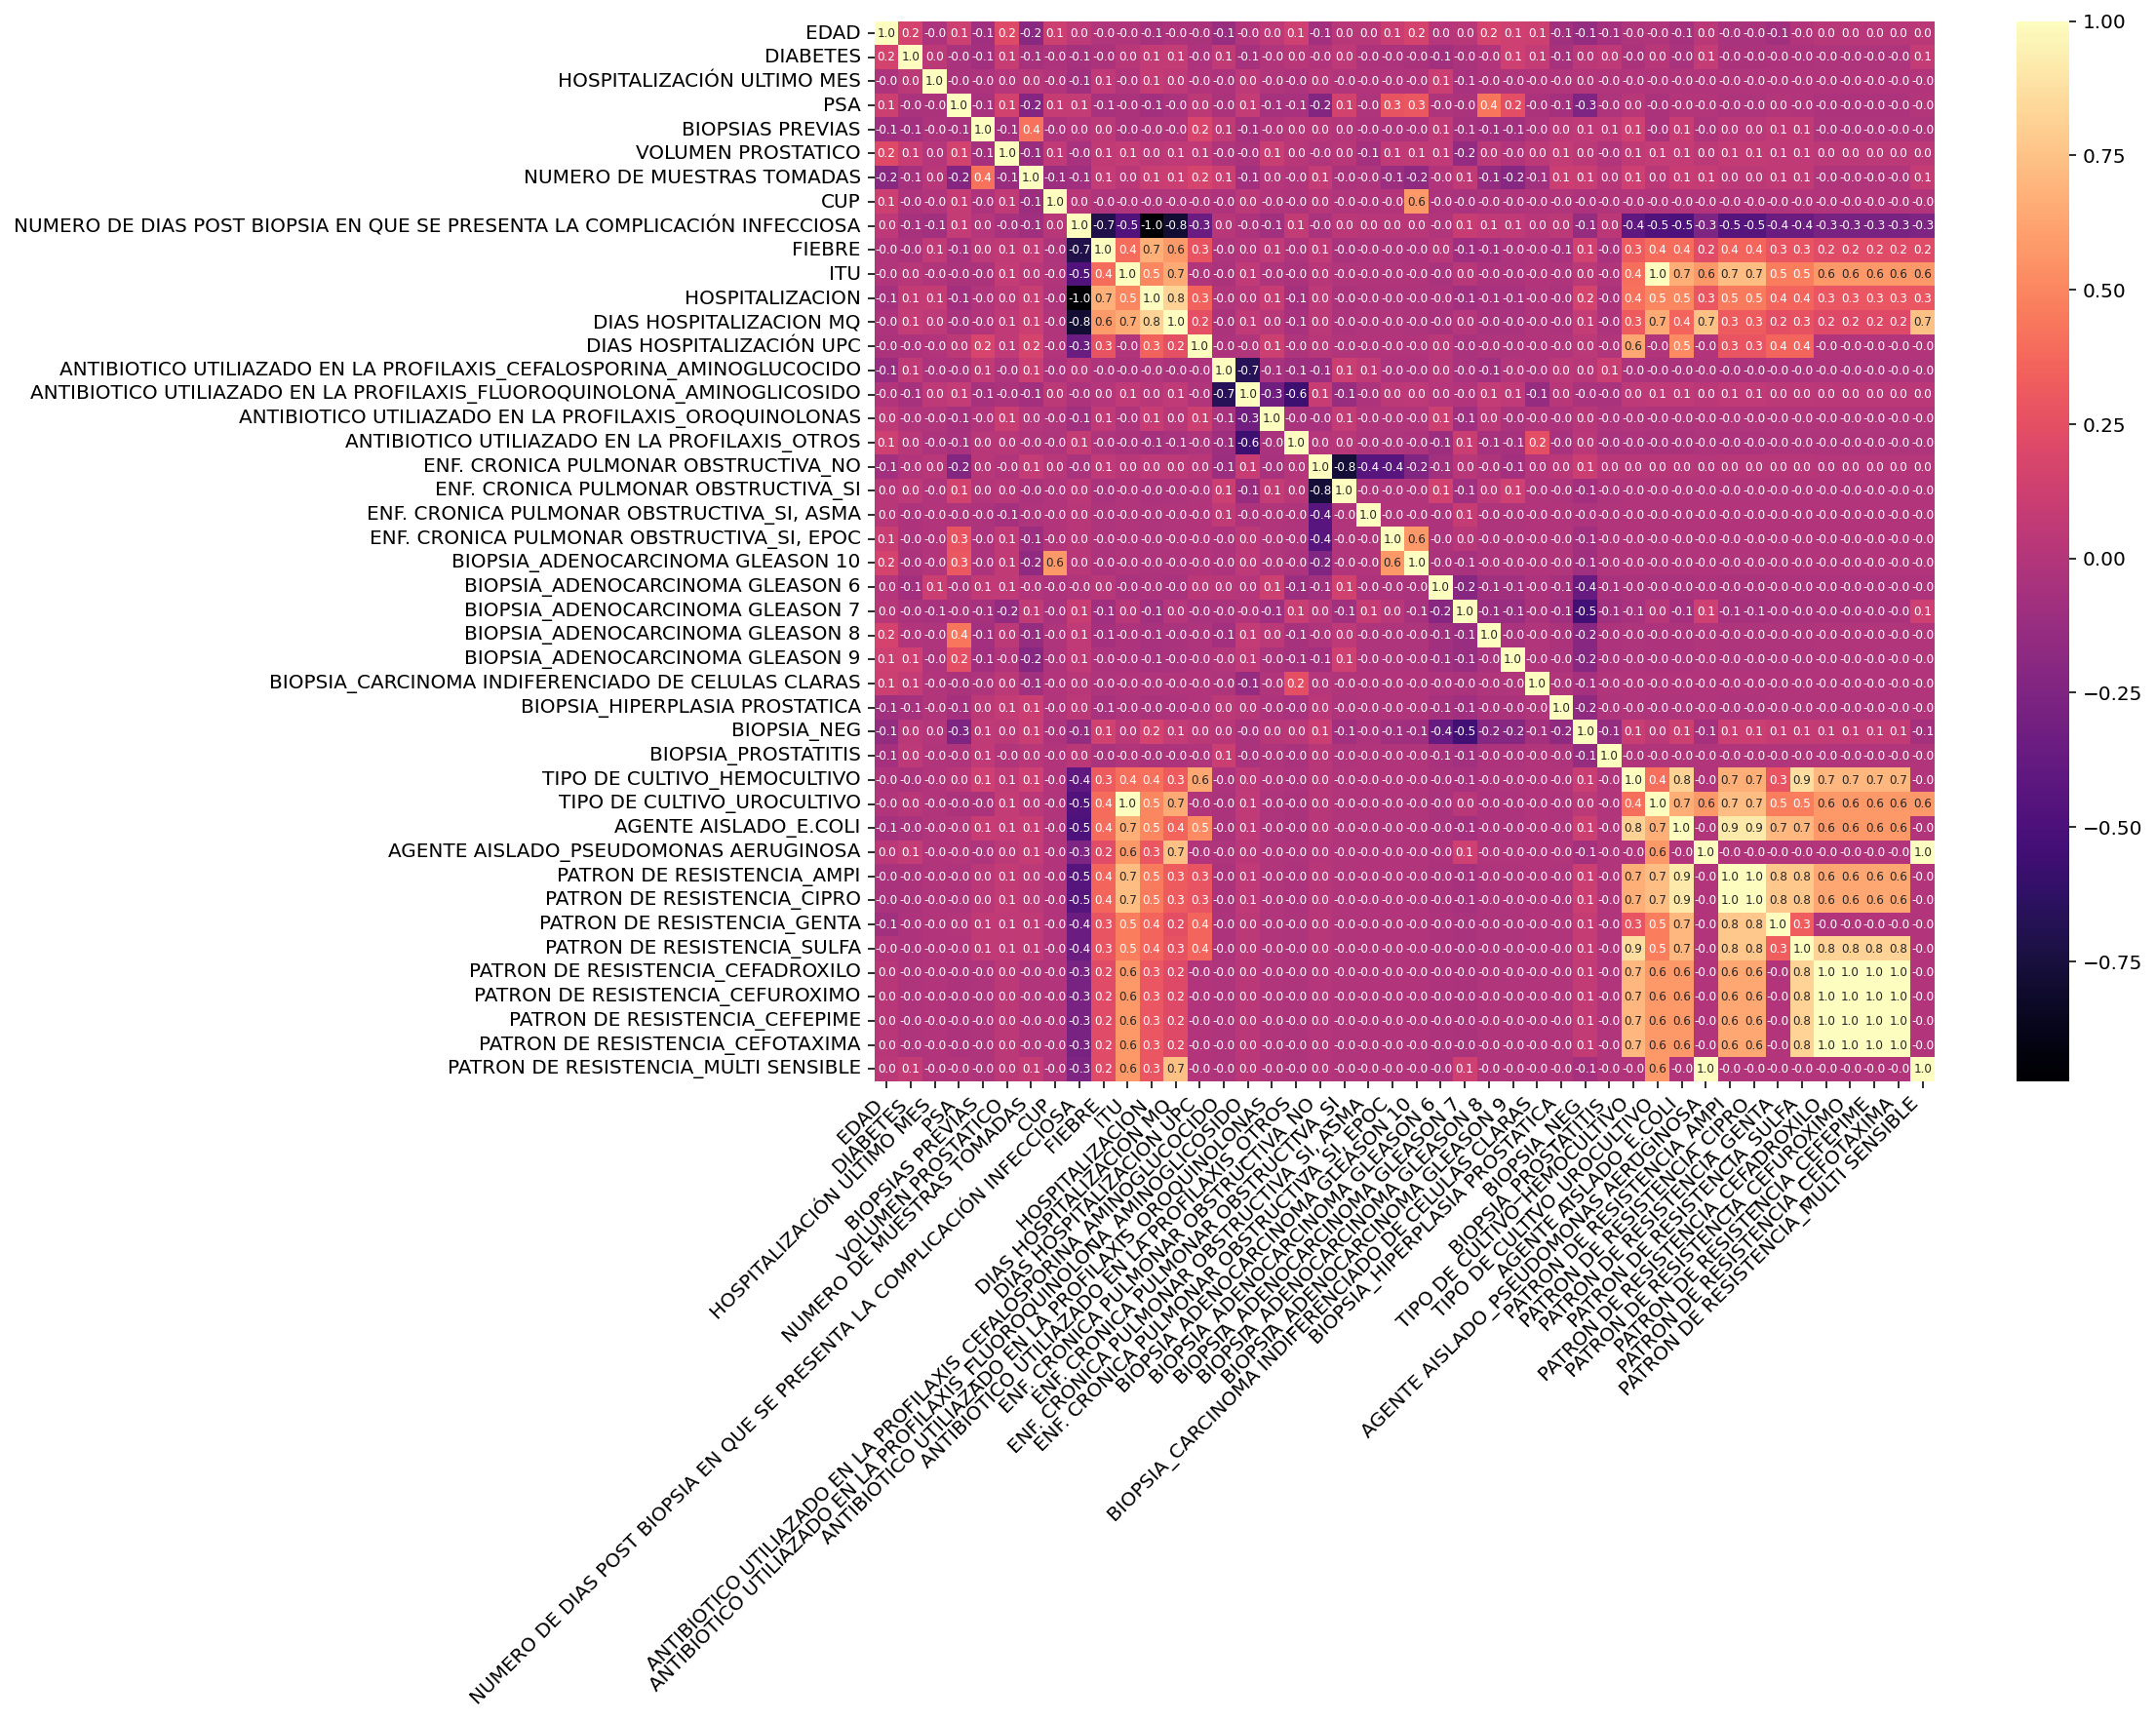

In [13]:
matriz = plt.figure(figsize= (15,10))
color = plt.get_cmap('magma')
color.set_bad('green')
sns.heatmap(df.corr(), annot=True, cmap=color, annot_kws={"size": 6 }, cbar=True, square=True, fmt='.1f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

**2.6 Eliminar variables irrelevantes.**


In [14]:
# Preliminarmente se considera eliminar las columnas 'CUP' y 'ENF. CRONICA PULMONAR OBSTRUCTIVA' del análisis, ya que estas variables se consideran que no guardan una relación directa con las características más importantes que tienen los pacientes que terminanen hospitalización
matriz_correlacion_ENF_CRONICA = df[
    [
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_NO',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA',
        'HOSPITALIZACION'
    ]
].corr()
matriz_correlacion_ENF_CRONICA

,ENF. CRONICA PULMONAR OBSTRUCTIVA_NO,ENF. CRONICA PULMONAR OBSTRUCTIVA_SI,"ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC","ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA",HOSPITALIZACION
ENF. CRONICA PULMONAR OBSTRUCTIVA_NO,1.000000,-0.769122,-0.440959,-0.440959,0.044652
ENF. CRONICA PULMONAR OBSTRUCTIVA_SI,-0.769122,1.000000,-0.012113,-0.012113,-0.034342
"ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC",-0.440959,-0.012113,1.000000,-0.006944,-0.019689
"ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA",-0.440959,-0.012113,-0.006944,1.000000,-0.019689
HOSPITALIZACION,0.044652,-0.034342,-0.019689,-0.019689,1.000000


In [15]:
matriz_correlacion_CUP = df[['CUP','HOSPITALIZACION']].corr()
matriz_correlacion_CUP

,CUP,HOSPITALIZACION
CUP,1.000000,-0.019689
HOSPITALIZACION,-0.019689,1.000000


In [16]:
# Una vez analizadas las correlaciones de ambas variables con la variable objetivo que sería la 'HOSPITALIZACION'
# Se eliminan las columnas ['CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA_NO', 'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI','ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC','ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA'] del análisis

def drop_columnas_irrelevantes(df):
    columnas_a_dropear = [
        'CUP',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_NO',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA'
    ]
    for columna in columnas_a_dropear: df.drop(columna, axis=1, inplace=True)

drop_columnas_irrelevantes(df)

**2.7 Revisar la distribución estadística para las variables numéricas.**


In [17]:
# Muestra estadísticas descriptivas
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,64.250575,14.230483,12.903448,29.386207,0.209195,0.018391
std,9.965342,17.388137,3.991334,6.561850,1.081861,0.224393
min,39.000000,0.600000,4.000000,1.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,31.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,31.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,31.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,31.000000,12.000000,3.000000


¿Qué gráficos permiten realizar un estudio exploratorio de la distribución?


_Histogramas y boxplots_


----------------------------------------------------------------------------------------------------
Las variables númericas son:  ['EDAD' 'PSA' 'NUMERO DE MUESTRAS TOMADAS'
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
 'DIAS HOSPITALIZACION MQ' 'DIAS HOSPITALIZACIÓN UPC']


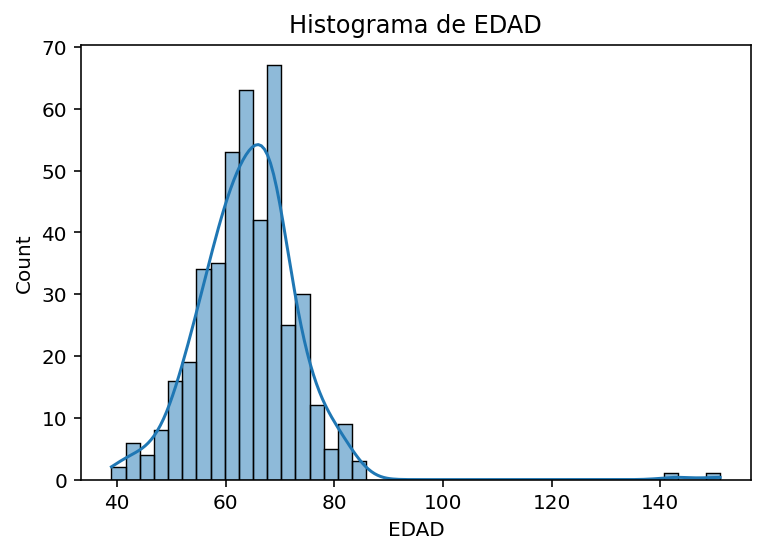

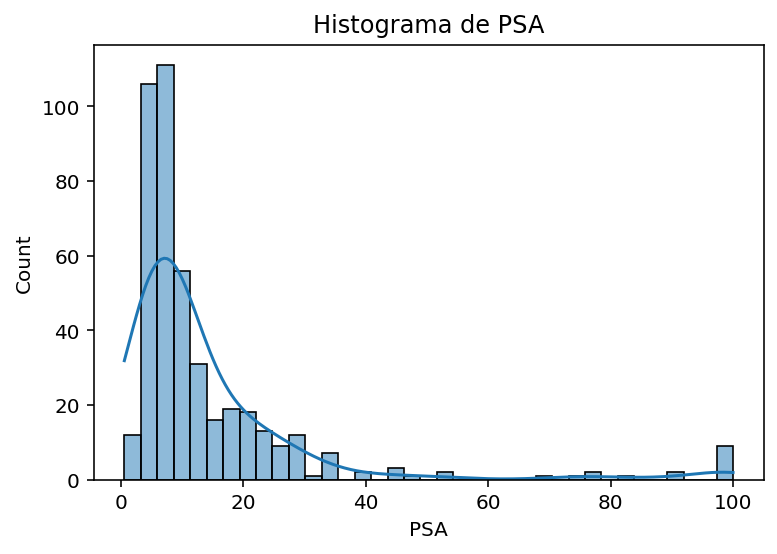

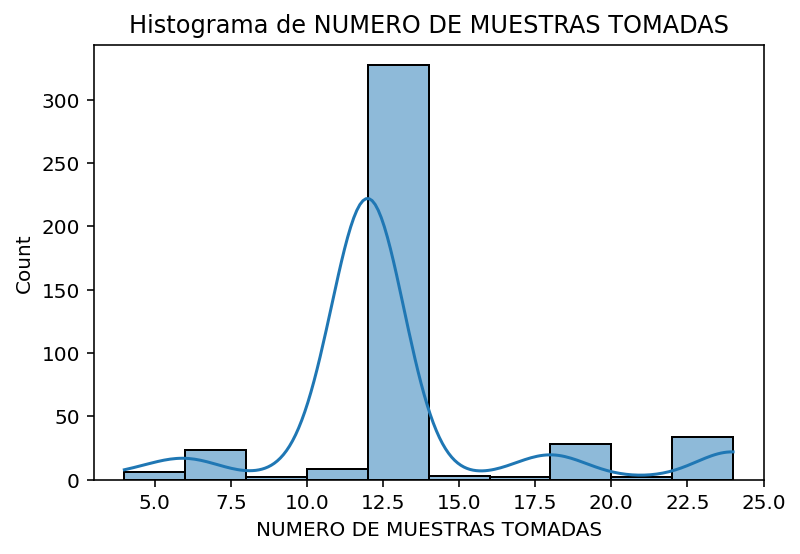

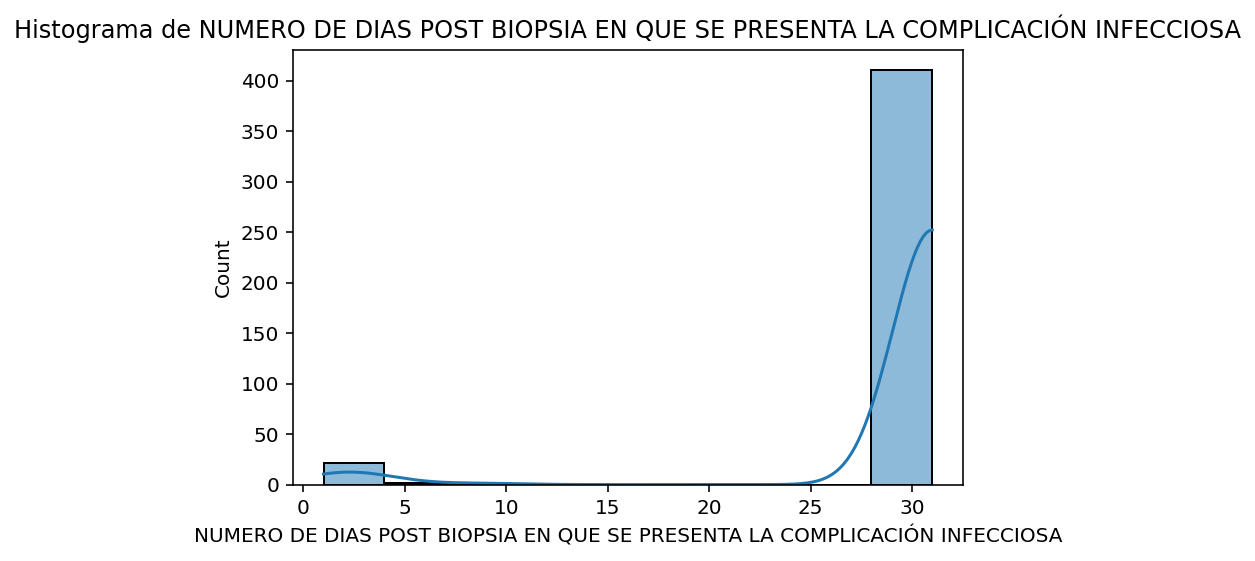

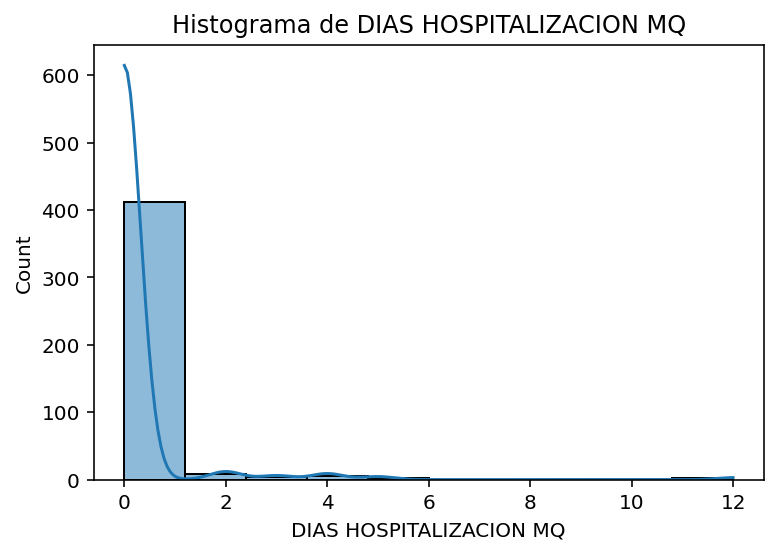

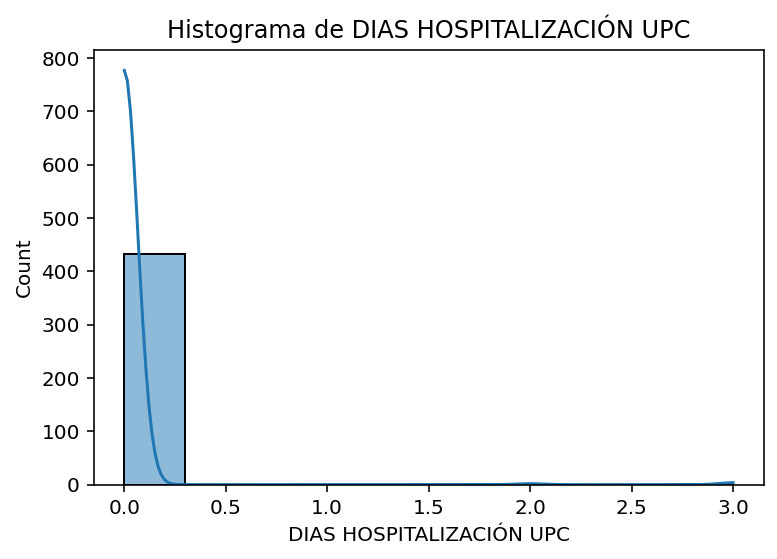

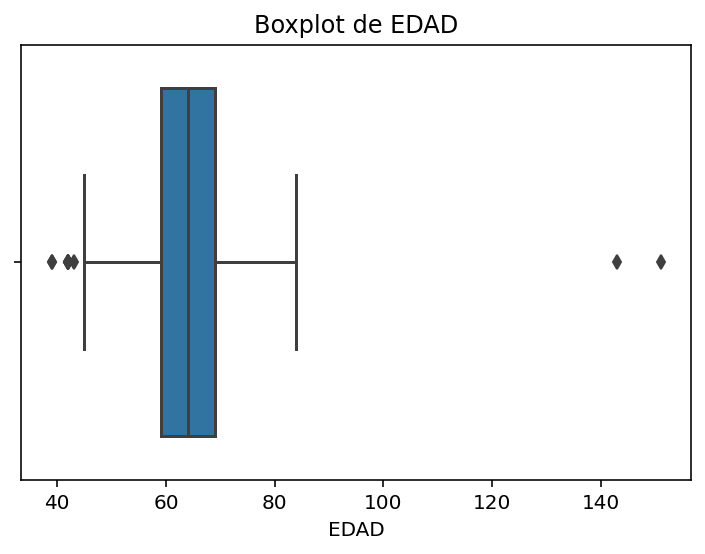

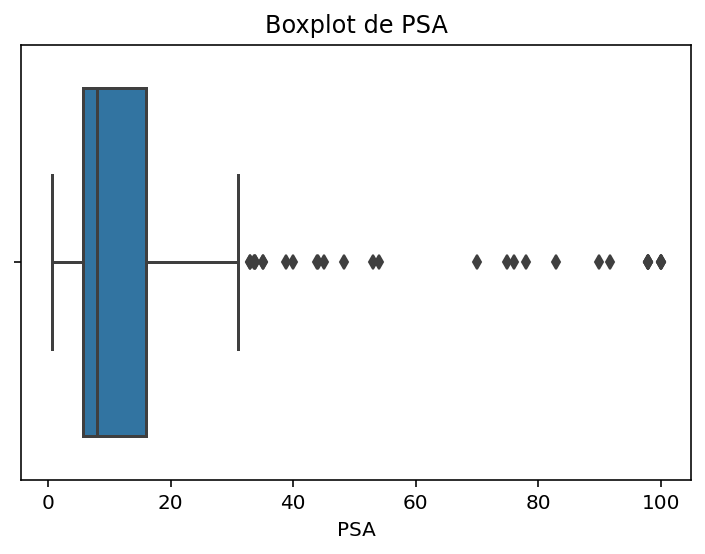

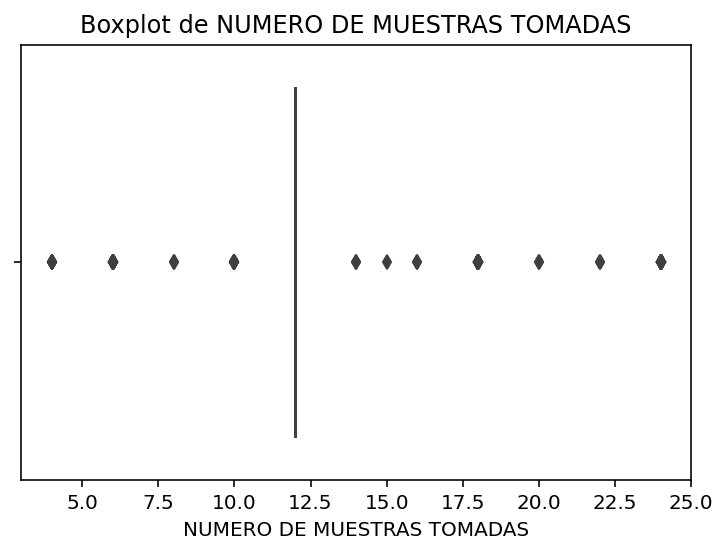

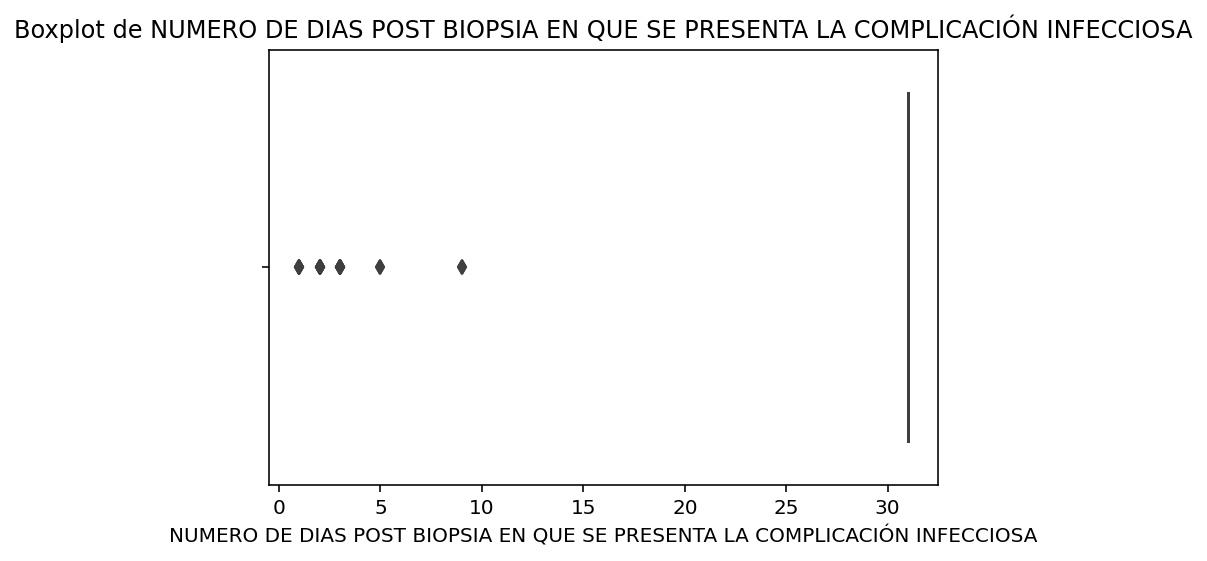

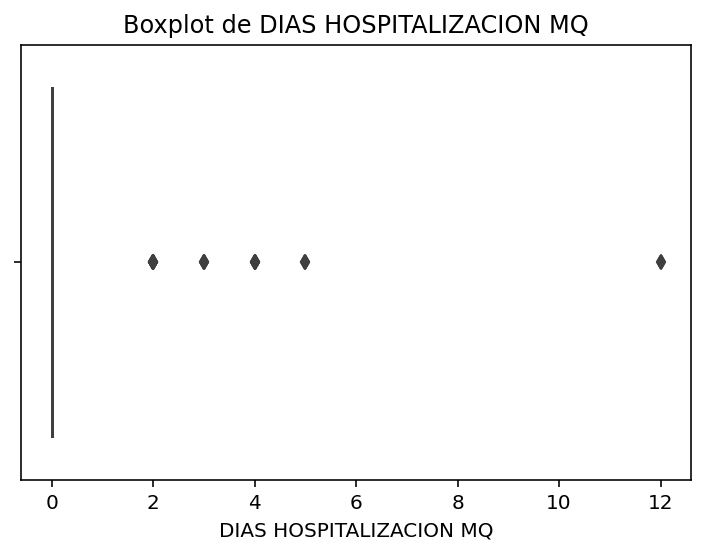

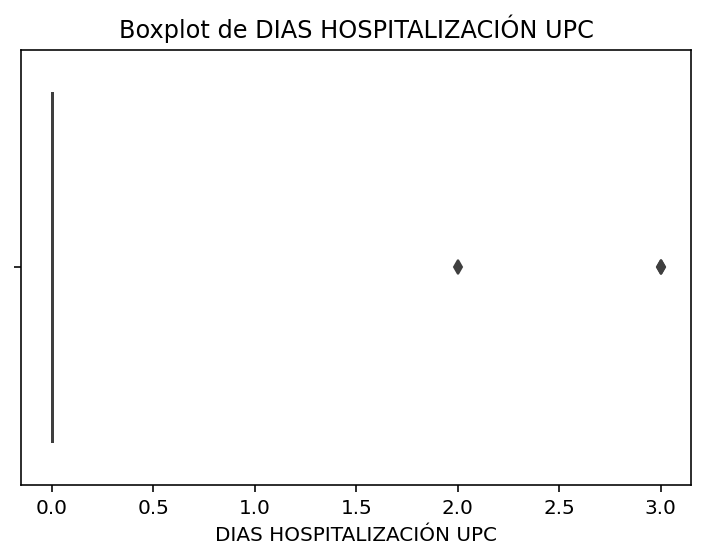

In [18]:
# Dibuja histogramas para las variables numéricas
num_cols = df.select_dtypes(include=['number']).columns
print ("--------------------"*5)
print ("Las variables númericas son: ", (num_cols.values))
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

# Dibuja un boxplot para identificar datos atípicos
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

¿Hay datos atípicos?


_Sí; edades mayores a 100_


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.


_Se eliminan 2 registros con edad atípica, al no poderse imputar a partir de ninguna otra columna._



In [19]:
# Se encontraron valores atípicos en la columna EDAD: 2 pacientes con edades 141 y 153 años.

# Se eliminan esos registros
def borrar_atipicos(dataframe):
    dataframe.drop(dataframe[dataframe['EDAD'] > 100].index, inplace=True)

borrar_atipicos(df)

df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,63.868360,14.267344,12.907621,29.378753,0.210162,0.018476
std,8.236872,17.419801,4.000088,6.576101,1.084268,0.224908
min,39.000000,0.600000,4.000000,1.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,31.000000,0.000000,0.000000
50%,64.000000,8.100000,12.000000,31.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,31.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,31.000000,12.000000,3.000000


**2.8 Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría.**


In [20]:
# Lista de prefijos de las columnas previamente encodificadas en one-hot
col_cat = ['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_', 'BIOPSIA_', 'TIPO DE CULTIVO_', 'AGENTE AISLADO_','PATRON DE RESISTENCIA_']
# Crear una lista de tuplas de las columnas previamente encodificadas en one-hot
onehot_categoricas =  [(col[:-1],[onehot_col.replace(col, '') for onehot_col in df.columns if onehot_col.startswith(col)]) for col in col_cat]

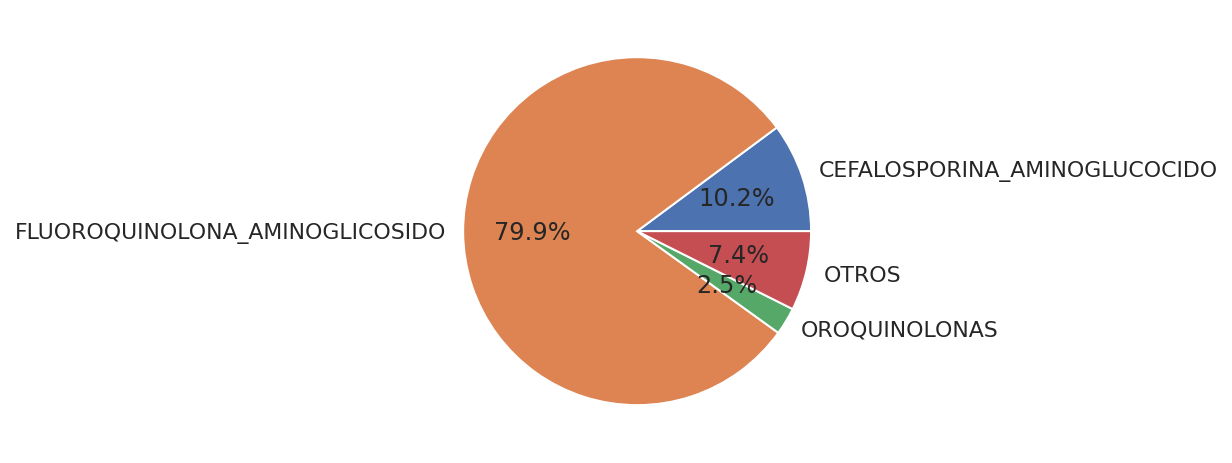

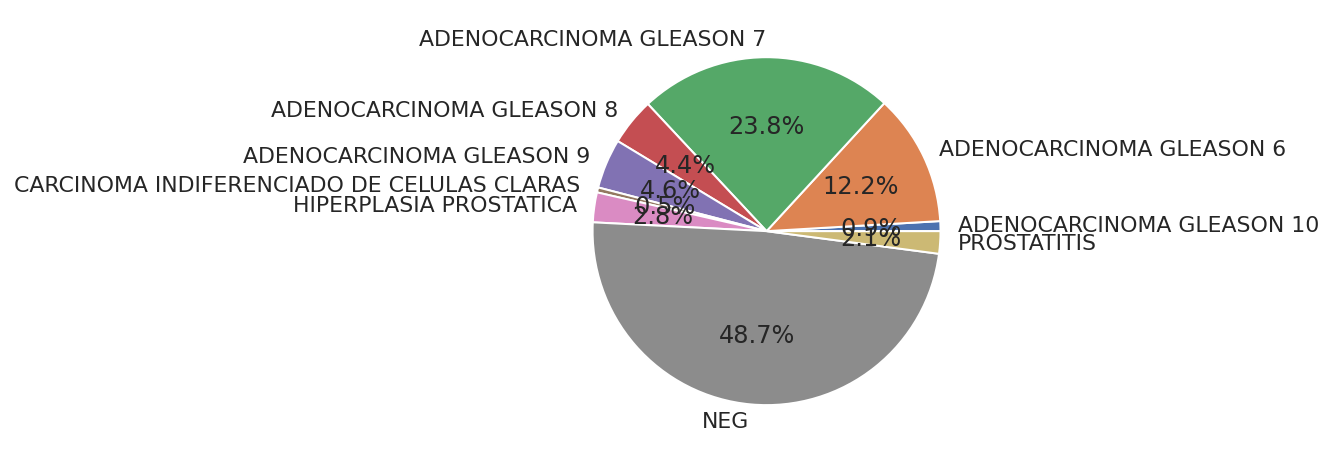

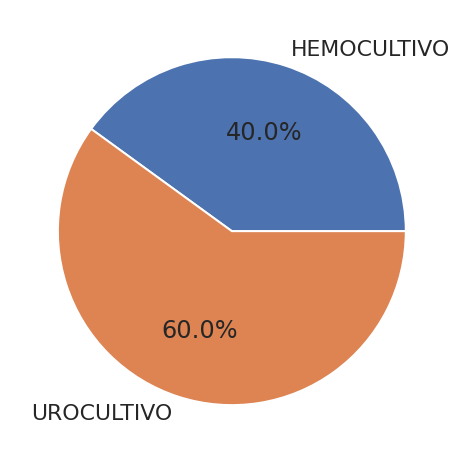

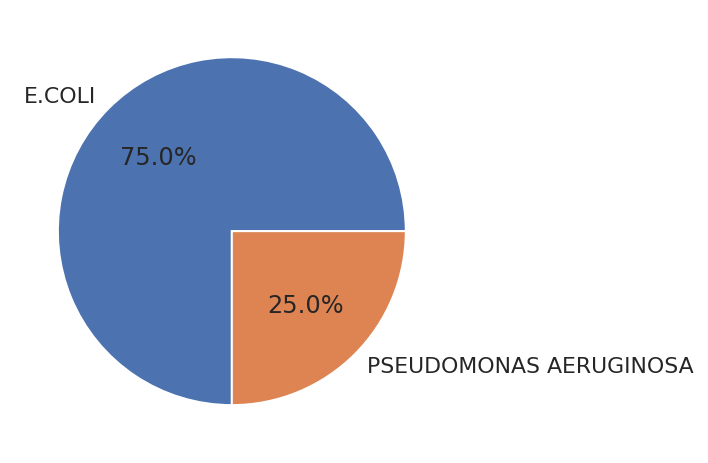

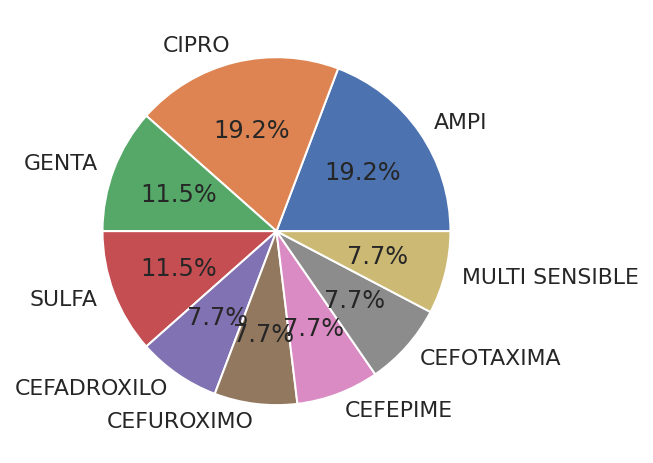

In [21]:
# Declarar una función para graficar las columnas categóricas
def grafica_pie(columnas, etiquetas):
    # Crear un DataFrame a partir de las columnas
    df = pd.DataFrame(columnas)
    # Contar el número de True en cada columna
    conteo = df.sum()
    # Crear un gráfico de pie con los conteos y las etiquetas
    sns.set_theme()
    plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%')
    plt.show()

#Graficar cada tupla de onehot_categoricas
for graf in onehot_categoricas:
    grafica_pie(df[[graf[0]+'_'+c for c in graf[1]]], graf[1])

**2.9 Para el caso de las variables numéricas, ¿Es necesario normalizar?**


_Para ninguno de los modelos en los que trabajamos Arbol de decisión y KMeans hizo falta normalizar los datos._


**2.10 Exportar la base de datos preparada en un archivo .csv para el modelamiento.** 


In [22]:
df.to_csv('modelo_para_ml.csv')